# mor

In [1]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="mor")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="mor")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="mor")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="mor")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="mor")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="mor")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 64.0
最適なgamma: 1.0


,false,mor
false,350,3
mor,3,55


,false,mor
false,116,2
mor,1,18


正解率(Accuracy) : 訓練 0.9854014598540146, 検証 0.9781021897810219
適合率(Precision) : 訓練 0.9482758620689655, 検証 0.9
再現率(Recall) : 訓練 0.9482758620689655, 検証 0.9473684210526315
F1スコア : 訓練 0.9482758620689655, 検証 0.9230769230769231


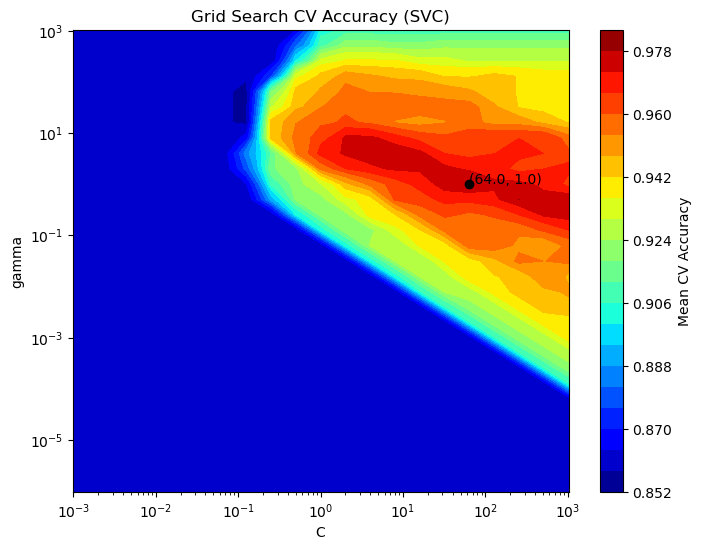

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# jbw

In [3]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="jbw")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="jbw")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="jbw")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="jbw")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="jbw")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="jbw")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 256.0
最適なgamma: 2.0


,false,jbw
false,394,0
jbw,0,17


,false,jbw
false,129,2
jbw,2,4


正解率(Accuracy) : 訓練 1.0, 検証 0.9708029197080292
適合率(Precision) : 訓練 1.0, 検証 0.6666666666666666
再現率(Recall) : 訓練 1.0, 検証 0.6666666666666666
F1スコア : 訓練 1.0, 検証 0.6666666666666666


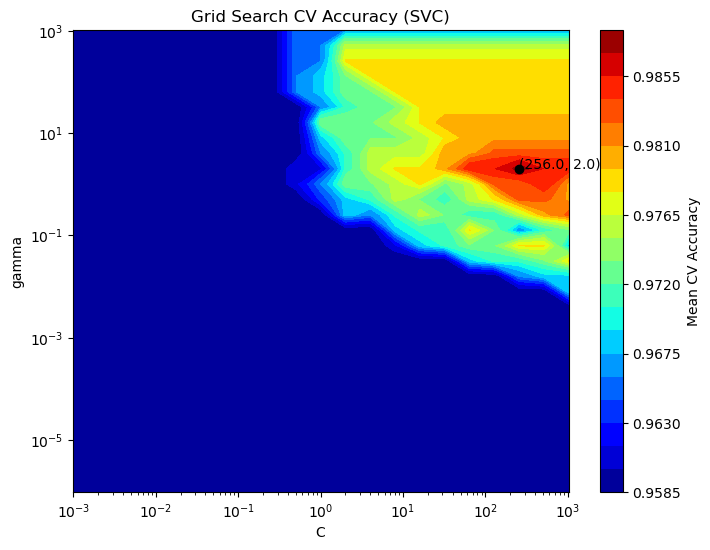

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# d6r

In [5]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d6r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d6r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d6r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d6r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d6r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 32.0
最適なgamma: 16.0


,d6r,false
d6r,132,4
false,2,273


,d6r,false
d6r,28,18
false,12,79


正解率(Accuracy) : 訓練 0.9854014598540146, 検証 0.781021897810219
適合率(Precision) : 訓練 0.9850746268656716, 検証 0.7
再現率(Recall) : 訓練 0.9705882352941176, 検証 0.6086956521739131
F1スコア : 訓練 0.9777777777777777, 検証 0.6511627906976745


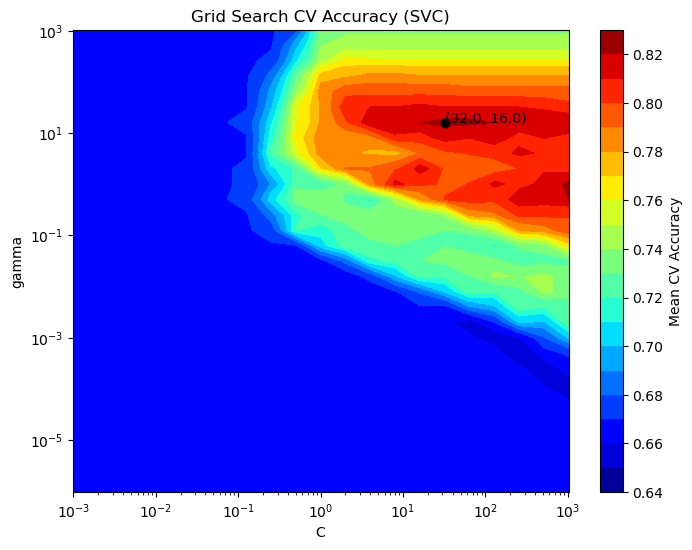

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# d8r

In [7]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d8r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d8r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d8r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d8r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d8r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d8r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 4.0
最適なgamma: 2.0


,d8r,false
d8r,34,12
false,0,365


,d8r,false
d8r,9,6
false,2,120


正解率(Accuracy) : 訓練 0.9708029197080292, 検証 0.9416058394160584
適合率(Precision) : 訓練 1.0, 検証 0.8181818181818182
再現率(Recall) : 訓練 0.7391304347826086, 検証 0.6
F1スコア : 訓練 0.85, 検証 0.6923076923076923


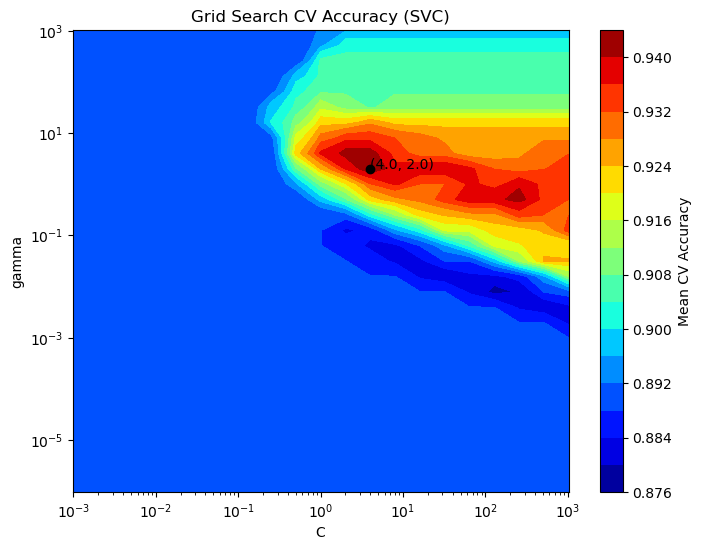

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# can

In [9]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="can")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="can")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="can")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="can")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="can")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="can")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 8.0
最適なgamma: 2.0


,can,false
can,73,10
false,10,318


,can,false
can,23,5
false,4,105


正解率(Accuracy) : 訓練 0.9513381995133819, 検証 0.9343065693430657
適合率(Precision) : 訓練 0.8795180722891566, 検証 0.8518518518518519
再現率(Recall) : 訓練 0.8795180722891566, 検証 0.8214285714285714
F1スコア : 訓練 0.8795180722891566, 検証 0.8363636363636363


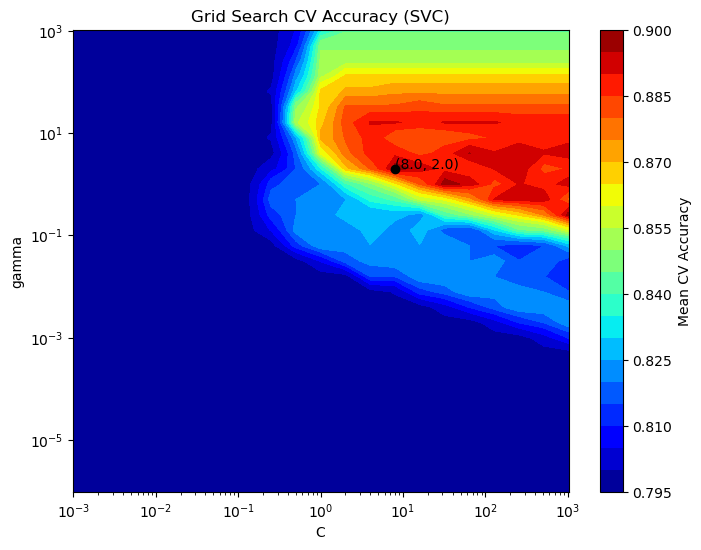

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# sod

In [11]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="sod")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="sod")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="sod")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="sod")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="sod")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="sod")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 32.0
最適なgamma: 0.25


,false,sod
false,296,2
sod,9,104


,false,sod
false,97,2
sod,4,34


正解率(Accuracy) : 訓練 0.9732360097323601, 検証 0.9562043795620438
適合率(Precision) : 訓練 0.9811320754716981, 検証 0.9444444444444444
再現率(Recall) : 訓練 0.9203539823008849, 検証 0.8947368421052632
F1スコア : 訓練 0.9497716894977168, 検証 0.918918918918919


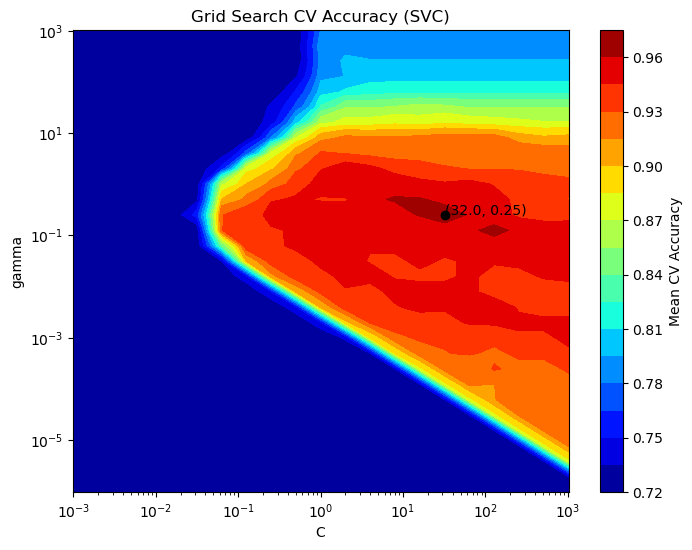

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# lta

In [13]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="lta")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="lta")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="lta")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="lta")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="lta")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="lta")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 32.0
最適なgamma: 2.0


,false,lta
false,351,0
lta,4,56


,false,lta
false,116,1
lta,6,14


正解率(Accuracy) : 訓練 0.9902676399026764, 検証 0.948905109489051
適合率(Precision) : 訓練 1.0, 検証 0.9333333333333333
再現率(Recall) : 訓練 0.9333333333333333, 検証 0.7
F1スコア : 訓練 0.9655172413793104, 検証 0.8


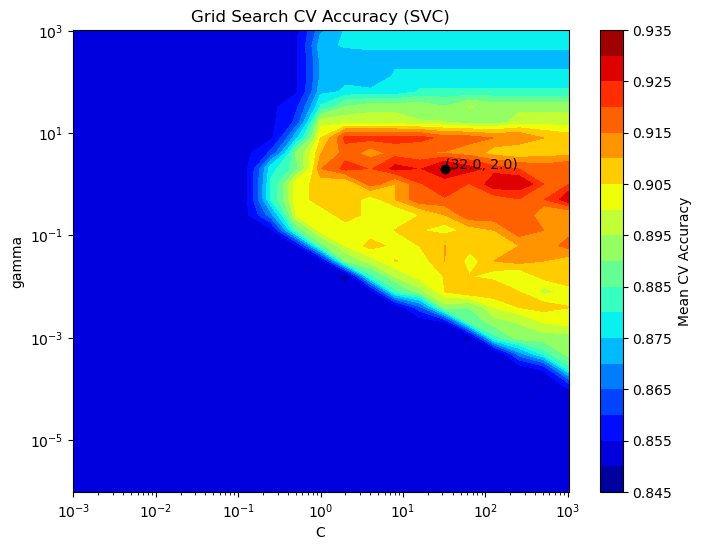

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 4

In [15]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 16]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 256.0
最適なgamma: 0.125


,4,false
4,219,17
false,16,159


,4,false
4,74,5
false,9,49


正解率(Accuracy) : 訓練 0.9197080291970803, 検証 0.8978102189781022
適合率(Precision) : 訓練 0.9319148936170213, 検証 0.891566265060241
再現率(Recall) : 訓練 0.9279661016949152, 検証 0.9367088607594937
F1スコア : 訓練 0.9299363057324841, 検証 0.9135802469135802


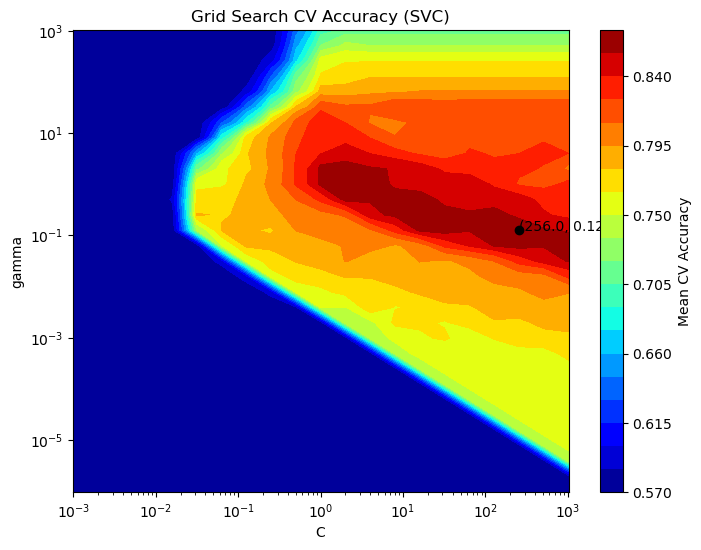

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 6

In [17]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 17]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 2.0
最適なgamma: 8.0


,6,false
6,226,4
false,17,164


,6,false
6,66,10
false,21,40


正解率(Accuracy) : 訓練 0.948905109489051, 検証 0.7737226277372263
適合率(Precision) : 訓練 0.9300411522633745, 検証 0.7586206896551724
再現率(Recall) : 訓練 0.9826086956521739, 検証 0.868421052631579
F1スコア : 訓練 0.9556025369978859, 検証 0.8098159509202454


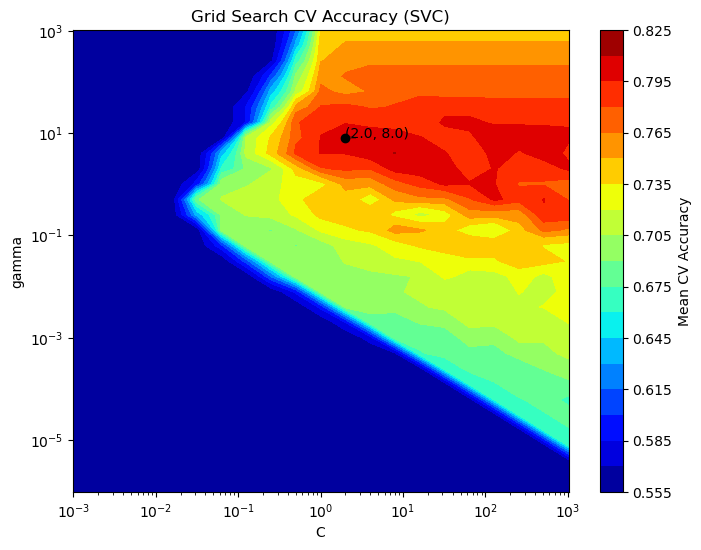

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 8

In [19]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 18]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="8")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="8")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="8")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="8")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="8")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="8")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 4.0
最適なgamma: 4.0


,8,false
8,123,8
false,5,275


,8,false
8,31,13
false,6,87


正解率(Accuracy) : 訓練 0.9683698296836983, 検証 0.8613138686131386
適合率(Precision) : 訓練 0.9609375, 検証 0.8378378378378378
再現率(Recall) : 訓練 0.9389312977099237, 検証 0.7045454545454546
F1スコア : 訓練 0.9498069498069498, 検証 0.7654320987654321


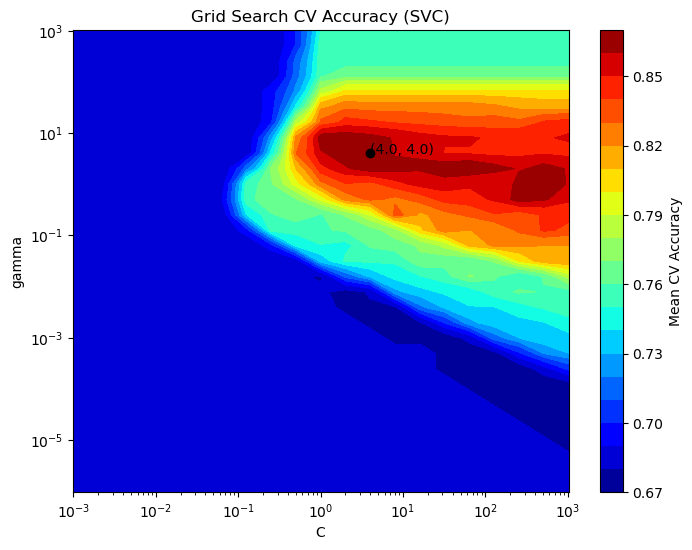

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 5-1

In [21]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 19]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="5-1")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="5-1")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="5-1")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="5-1")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="5-1")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="5-1")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 32.0
最適なgamma: 8.0


,5-1,false
5-1,61,2
false,1,347


,5-1,false
5-1,18,3
false,4,112


正解率(Accuracy) : 訓練 0.9927007299270073, 検証 0.948905109489051
適合率(Precision) : 訓練 0.9838709677419355, 検証 0.8181818181818182
再現率(Recall) : 訓練 0.9682539682539683, 検証 0.8571428571428571
F1スコア : 訓練 0.976, 検証 0.8372093023255814


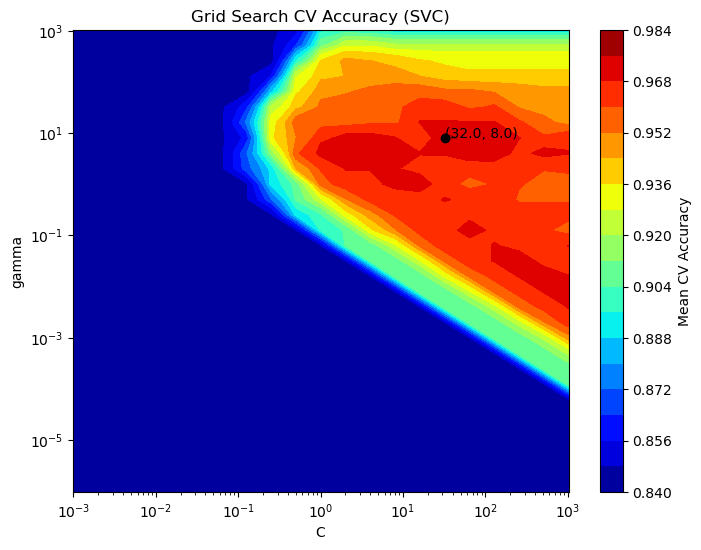

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 4-2

In [23]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 20]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4-2")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4-2")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 32.0
最適なgamma: 16.0


,4-2,false
4-2,132,4
false,2,273


,4-2,false
4-2,28,18
false,12,79


正解率(Accuracy) : 訓練 0.9854014598540146, 検証 0.781021897810219
適合率(Precision) : 訓練 0.9850746268656716, 検証 0.7
再現率(Recall) : 訓練 0.9705882352941176, 検証 0.6086956521739131
F1スコア : 訓練 0.9777777777777777, 検証 0.6511627906976745


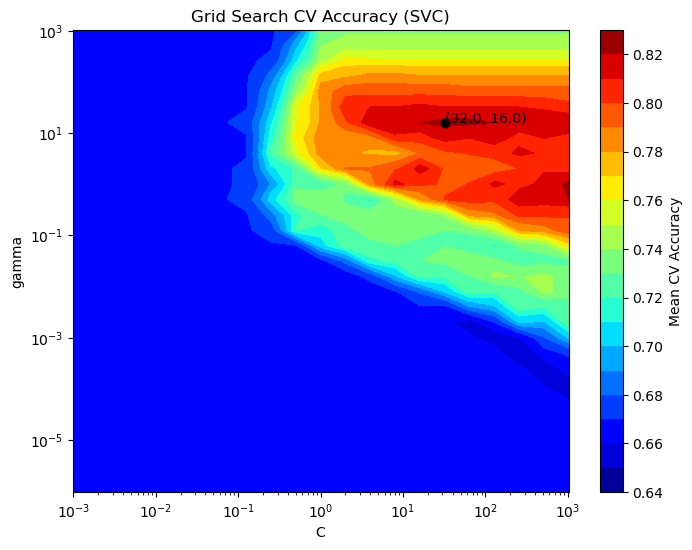

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 6-2

In [25]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6-2")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6-2")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 1024.0
最適なgamma: 8.0


,6-2,false
6-2,113,2
false,2,294


,6-2,false
6-2,25,14
false,7,91


正解率(Accuracy) : 訓練 0.9902676399026764, 検証 0.8467153284671532
適合率(Precision) : 訓練 0.9826086956521739, 検証 0.78125
再現率(Recall) : 訓練 0.9826086956521739, 検証 0.6410256410256411
F1スコア : 訓練 0.9826086956521739, 検証 0.704225352112676


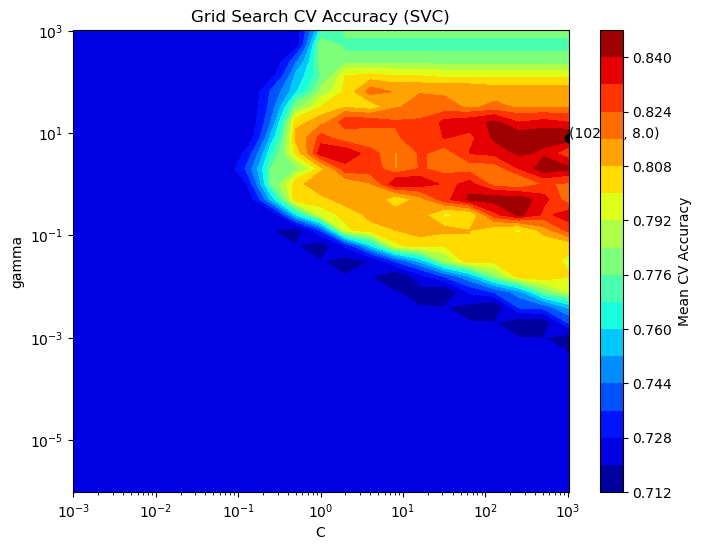

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')